# Analiza dividend delnic

V tej analizi bomo preučili **100 delnic z najvišjim dividendnim donosom**, pridobljenih s Finviz screenerjem.  
Delnice smo razvrstili **od največjega dividendnega donosa do najmanjšega** ter dodali omejitev, da imajo izbrana podjetja **tržno kapitalizacijo nad 2 milijardama USD**.  

S tem zagotovimo, da se osredotočamo na **priznana, stabilna podjetja**, kjer je izplačilo dividend bolj zanesljivo in reprezentativno.


In [6]:
#uvozimo potrebne knjiznce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#uporabimo za risanje grafov
%matplotlib inline
#naložimo csv
DELNICE = pd.read_csv("finviz_screener.csv")
#poskusimo če deluje
DELNICE.head()


,No.,Ticker,Company,Sector,Industry,Country,Market Cap,Dividend,Dividend.1,Volume,Price
0,1,IEP,Icahn Enterprises L P,Energy,Oil & Gas Refining & Marketing,USA,4.86B,2.00,23.61%,425823,8.47
1,2,BRSL,Brightstar Lottery PLC,Consumer Cyclical,Gambling,United Kingdom,3.15B,3.80,22.84%,1233513,16.64
2,3,IX,Orix Corporation ADR,Financial,Financial Conglomerates,Japan,29.35B,4.84,18.66%,189881,25.92
3,4,CLM,Cornerstone Strategic Investment Fund Inc,Financial,Closed-End Fund - Equity,USA,2.05B,1.41,17.37%,1541915,8.13
4,5,ADX,Adams Diversified Equity Fund,Financial,Closed-End Fund - Equity,USA,2.61B,3.35,15.44%,278419,21.69


##  Popravki tabele

Za boljšo preglednost bomo izvedli nekaj sprememb:
- Stolpec Dividend.1 bomo **preimenovali** v bolj smiselno ime.  
- Prevedli bomo imena stolpcev iz **angleščine v slovenščino**.  
- Okrajšave za **milijardo** bomo spremenili iz **B** v **številko pomnoženo z 1e9**  
  


In [7]:
# Preimenujmo stolpce
DELNICE = DELNICE.rename(columns={
    "No.": "Št.",
    "Ticker": "Oznaka",
    "Company": "Podjetje",
    "Sector": "Sektor",
    "Industry": "Panoga",
    "Country": "Država",
    "Market Cap": "Tržna kapitalizacija",
    "Dividend": "Dividenda",
    "Dividend.1": "Dividendni donos",
    "Volume": "Obseg",   
    "Price": "Cena"
})

DELNICE["Tržna kapitalizacija"] = (
    DELNICE["Tržna kapitalizacija"]
    .astype(str)
    .str.replace("B", "", regex=False)   
    .astype(float) * 1e9                 
)

# Preverimo
DELNICE.head()



,Št.,Oznaka,Podjetje,Sektor,Panoga,Država,Tržna kapitalizacija,Dividenda,Dividendni donos,Obseg,Cena
0,1,IEP,Icahn Enterprises L P,Energy,Oil & Gas Refining & Marketing,USA,4.860000e+09,2.00,23.61%,425823,8.47
1,2,BRSL,Brightstar Lottery PLC,Consumer Cyclical,Gambling,United Kingdom,3.150000e+09,3.80,22.84%,1233513,16.64
2,3,IX,Orix Corporation ADR,Financial,Financial Conglomerates,Japan,2.935000e+10,4.84,18.66%,189881,25.92
3,4,CLM,Cornerstone Strategic Investment Fund Inc,Financial,Closed-End Fund - Equity,USA,2.050000e+09,1.41,17.37%,1541915,8.13
4,5,ADX,Adams Diversified Equity Fund,Financial,Closed-End Fund - Equity,USA,2.610000e+09,3.35,15.44%,278419,21.69


## 1) Začnimo z analizo 10 najdražjih delnic

In [11]:
top10_najdrazje = DELNICE.nlargest(10, "Cena")[["Podjetje", "Cena"]]
top10_najdrazje



,Podjetje,Cena
12,Grupo Aeroportuario Del Sureste S.A. ADR,325.71
69,"United Parcel Service, Inc",87.44
32,Fomento Economico Mexicano S.A.B. de C.V. ADR,86.64
97,OneMain Holdings Inc,61.86
84,"Buckle, Inc",56.59
28,LyondellBasell Industries NV,56.35
82,Sunoco LP,52.30
55,MPLX LP,50.87
42,Grupo Cibest S.A. ADR,50.46
62,CNA Financial Corp,49.55


Vidimo da je daleč najdražja delnica **Grupo Aeroportuario Del Sureste S.A. ADR**. To lahko pirkžemo tudi z grafom za boljšo vizulaizacijo 

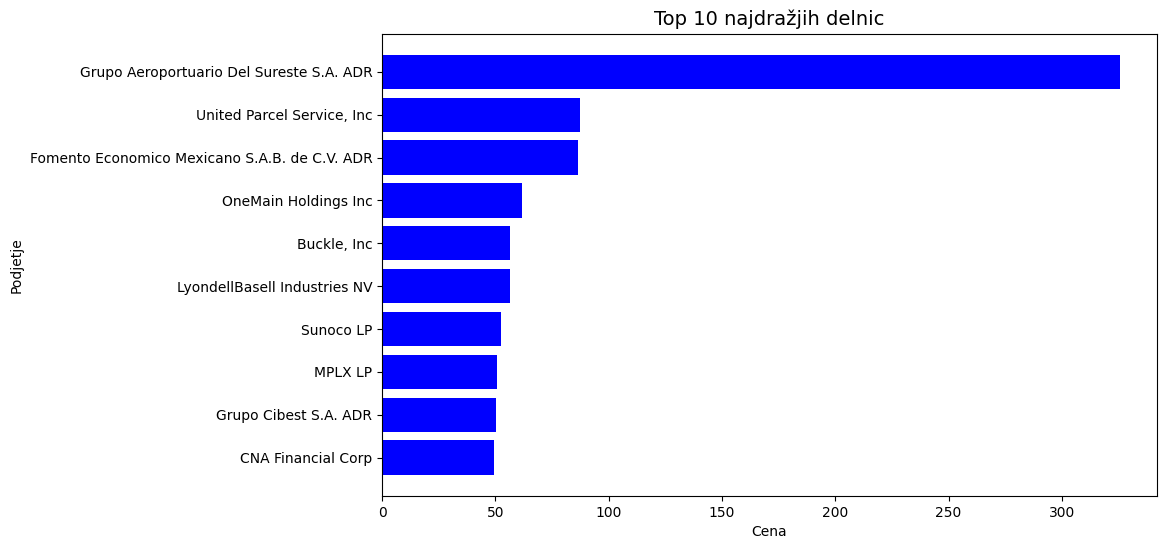

In [12]:
plt.figure(figsize=(10,6))
plt.barh(top10_najdrazje["Podjetje"], top10_najdrazje["Cena"], color="blue")
plt.gca().invert_yaxis()  
plt.title("Top 10 najdražjih delnic", fontsize=14)
plt.xlabel("Cena")
plt.ylabel("Podjetje")
plt.show()

### 1.1) Kategorizacija cen

In [15]:
def doloci_cenovni_razred(x):
    if x > 100:
        return '> 100 €'
    elif 75 < x <= 100:
        return '75–100 €'
    elif 50 < x <= 75:
        return '50–75 €'
    elif 25 < x <= 50:
        return '25–50 €' 
    else:
        return '≤ 25 €'


DELNICE["Cenovni razred"] = DELNICE["Cena"].apply(doloci_cenovni_razred)


kategorije = (
    DELNICE.groupby("Cenovni razred")
    .size()
    .reindex(["> 100 €", "75–100 €", "50–75 €", "25–50 €", "≤ 25 €"])
    .reset_index(name="Število delnic")
)

kategorije


,Cenovni razred,Število delnic
0,> 100 €,1
1,75–100 €,2
2,50–75 €,6
3,25–50 €,23
4,≤ 25 €,68


Vidimo da so delnice z viskomi dividendnimi donosi *"poceni"* v primerjavi z ostalimi delnicami na trgu. Saj jih večina pade v kategorijo **cenejše od 25 €**

## 2) Kateri sektor ima največ dividendnih delnic
Preštejemo pojavitve po stolpcu **Sektor** in narišemo stolpčni graf.

In [16]:
sektor_counts = DELNICE["Sektor"].value_counts().reset_index()
sektor_counts.columns = ["Sektor", "Število delnic"]
sektor_counts

,Sektor,Število delnic
0,Financial,35
1,Energy,24
2,Real Estate,12
3,Consumer Defensive,7
4,Communication Services,6
5,Industrials,4
6,Basic Materials,4
7,Consumer Cyclical,3
8,Utilities,3
9,Healthcare,2


Iz tabele je razvidno, da je največ dividendnih delnic v finančnem sektorju *(35)*, najmanj pa v v zdravstenem sektorju z *(2)*.

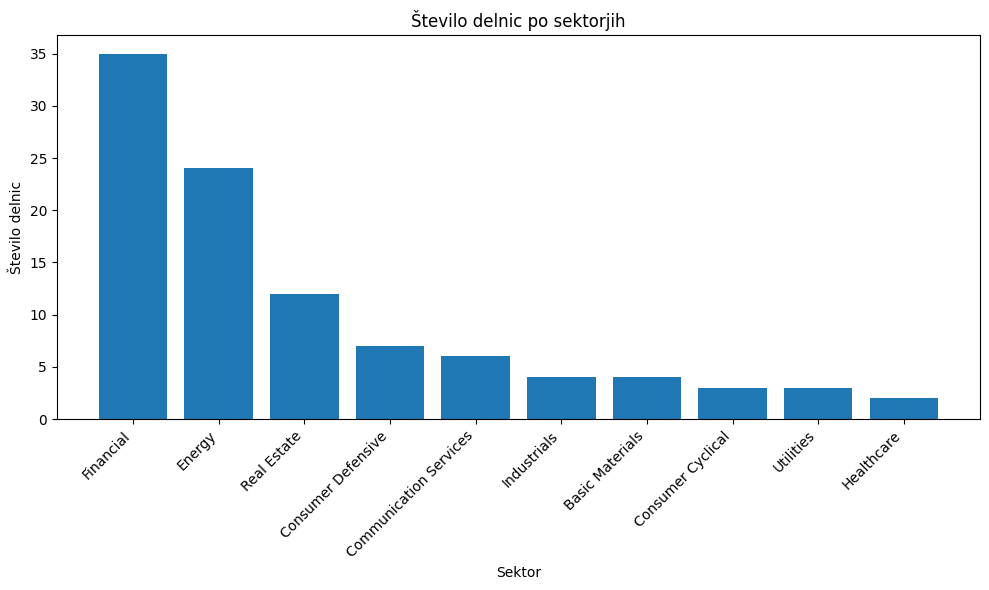

In [17]:
plt.figure(figsize=(10,6))
plt.bar(sektor_counts["Sektor"], sektor_counts["Število delnic"])
plt.xticks(rotation=45, ha="right")
plt.title("Število delnic po sektorjih")
plt.xlabel("Sektor")
plt.ylabel("Število delnic")
plt.tight_layout()
plt.show()

## 3) Najbolj trgovane delnice v zadjih 24 urah

In [18]:

top_trgovane = DELNICE.sort_values("Obseg", ascending=False).head(10)
top_trgovane[["Podjetje","Oznaka","Obseg","Sektor"]]

,Podjetje,Oznaka,Obseg,Sektor
89,Pfizer Inc,PFE,36985734,Healthcare
60,Banco Bradesco S.A. ADR,BBD,29247961,Financial
58,Ambev S.A. ADR,ABEV,26809250,Consumer Defensive
20,Petroleo Brasileiro S.A. Petrobras ADR,PBR,19646886,Energy
71,Itau Unibanco Holding S.A. ADR,ITUB,19475289,Financial
70,Vale S.A. ADR,VALE,15104218,Basic Materials
6,AGNC Investment Corp,AGNC,13958021,Real Estate
19,Western Union Company,WU,10561926,Financial
68,Energy Transfer LP,ET,8950656,Energy
43,Dow Inc,DOW,8789196,Basic Materials


Kljub temu da je zdravstevni sektor najmanjše zastopan med našimi top 100 delnicami vidimo da je pa ravno najbolj trgovana delnica v zadnjih 24 urah prav iz zdravstvenega sektorja. PokaŽimo to še z grafom.

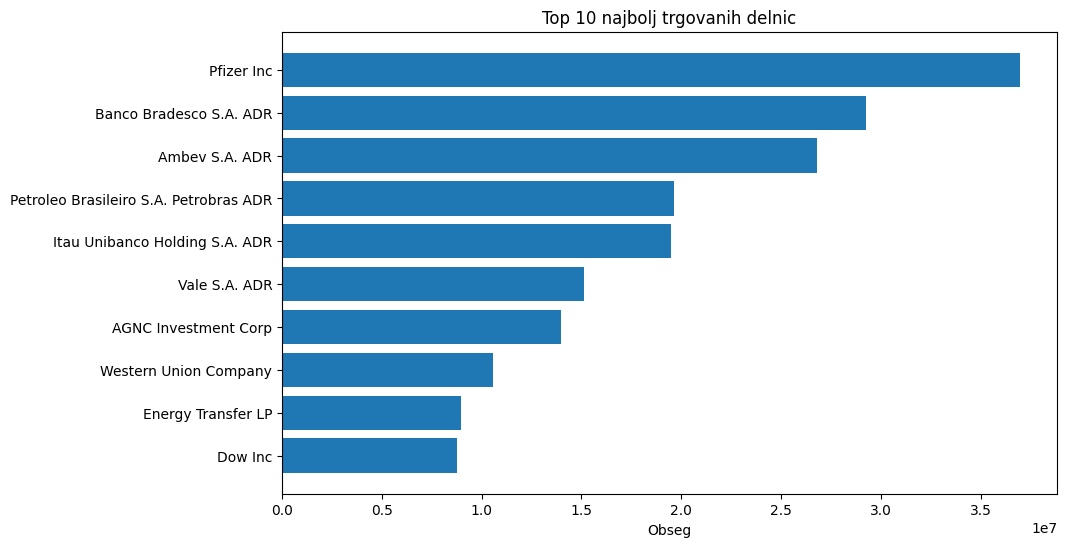

In [19]:

plt.figure(figsize=(10,6))
plt.barh(top_trgovane["Podjetje"], top_trgovane["Obseg"])
plt.gca().invert_yaxis()
plt.title("Top 10 najbolj trgovanih delnic")
plt.xlabel("Obseg")
plt.show()

## 4) Preverimo še iz katerih držav so te delnice

In [13]:
drzave = (
    DELNICE.drop_duplicates(subset="Oznaka")["Država"]
    .value_counts()
    .head(10)
    .reset_index()
)
drzave.columns = ["Država","Število podjetij"]
drzave

,Država,Število podjetij
0,USA,68
1,Brazil,9
2,United Kingdom,4
3,Canada,3
4,Singapore,3
5,Luxembourg,3
6,Colombia,2
7,Mexico,2
8,Japan,1
9,Philippines,1


Kot lahko opazimo, prihaja največ delnic iz Združenih držav Amerike, kar ni presenetljivo. Presenetljivejši pa je podatek, da je med njimi kar 13 delnic iz Južne Amerike ter ena iz Filipinov – držav, ki veljajo za manj razvite v primerjavi z drugimi večjimi svetovnimi trgi.

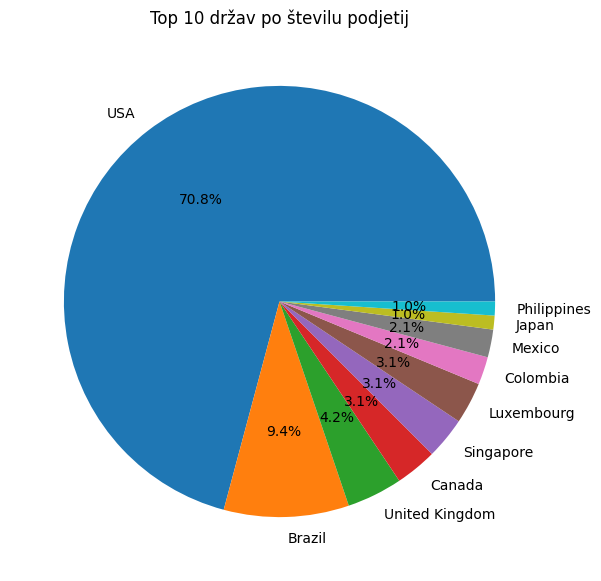

In [14]:
plt.figure(figsize=(7,7))
plt.pie(drzave["Število podjetij"], labels=drzave["Država"], autopct="%1.1f%%")
plt.title("Top 10 držav po številu podjetij")
plt.show()

## 5) Potencialne delnice za investiranje

Potencialne delnice bomo filtrirali glede na naslednje kriterije: tržna kapitalizacija nad **5 milijonov evrov**, **cena pod 25 evrov** ter pripadnost **energetskemu sektorju**, v katerega verjamemo v prihodnosti. Poleg tega bomo upoštevali le tiste delnice, ki so že dokazano aktivne na trgu, saj imajo v zadnjih **24 urah obseg trgovanja nad 800 tisoč**.

In [31]:
potencialne = DELNICE[
    (DELNICE["Tržna kapitalizacija"] > 5_000_000_000) &
    (DELNICE["Cenovni razred"] == "≤ 25 €") &
    (DELNICE["Sektor"] == "Energy") &
    (DELNICE["Obseg"] > 800_000)
]

potencialne[["Oznaka", "Podjetje", "Cena", "Dividendni donos", "Tržna kapitalizacija", "Obseg", "Sektor"]].head(10)



,Oznaka,Podjetje,Cena,Dividendni donos,Tržna kapitalizacija,Obseg,Sektor
11,EC,Ecopetrol SA ADR,9.40,12.69%,1.932000e+19,1472459,Energy
13,PBR-A,Petroleo Brasileiro S.A. Petrobras ADR,11.47,11.63%,3.034000e+19,6379880,Energy
14,ARLP,"Alliance Resource Partners, LP",23.01,11.30%,2.960000e+18,874087,Energy
17,BSM,Black Stone Minerals L.P,12.16,10.88%,2.580000e+18,1461364,Energy
20,PBR,Petroleo Brasileiro S.A. Petrobras ADR,12.40,10.40%,4.614000e+19,19646886,Energy
39,PAA,Plains All American Pipeline LP,18.00,8.63%,1.266000e+19,1783121,Energy
47,FRO,Frontline Plc,20.90,8.26%,4.650000e+18,4176897,Energy
68,ET,Energy Transfer LP,17.72,7.49%,6.083000e+19,8950656,Energy


## 6) Kako z 1.000.000 € doseči največ izplačanih dividend

Z uporabo filtrov in izračunov smo določili tiste delnice, pri katerih bi lahko z vložkom **1.000.000 €** dosegli **največje letno izplačilo dividend**.


In [48]:

# 1) Filtriramo stabilne delnice
kandidati = DELNICE[
    (DELNICE["Tržna kapitalizacija"] > 5_000_000_000) &
    (DELNICE["Obseg"] > 1_000_000)
].copy()

# 2) Razvrstimo po dividendnem donosu (najvišji na vrhu)
kandidati = kandidati.sort_values("Dividendni donos", ascending=False)

# 3) Izberemo samo TOP 20
top20 = kandidati.head(20).copy()

# 4) Kapital enakomerno razdelimo med teh 20
kapital = 1_000_000 / len(top20)

# 5) Izračun števila kupljenih delnic in dividend
top20.loc[:, "Št. delnic kupljenih"] = (kapital // top20["Cena"]).astype(int)
top20.loc[:, "Dejanske dividende"] = top20["Št. delnic kupljenih"] * top20["Dividenda"]

# 6) Seštevek dividend in donos v %
skupaj_dividende = top20["Dejanske dividende"].sum()
donos = skupaj_dividende / 1_000_000 * 100

print(f"\nSkupni letni znesek dividend: {skupaj_dividende:,.2f} €")
print(f"Skupni dividendni donos: {donos:.2f}%")

# 7) Prikažemo tabelo
top20[[
    "Oznaka", "Podjetje", "Sektor","Država", 
    "Cena",
    "Dividenda", "Dividendni donos",
    "Št. delnic kupljenih", "Dejanske dividende"
]]







Skupni letni znesek dividend: 82,677.18 €
Skupni dividendni donos: 8.27%


,Oznaka,Podjetje,Sektor,Država,Cena,Dividenda,Dividendni donos,Št. delnic kupljenih,Dejanske dividende
28,LYB,LyondellBasell Industries NV,Basic Materials,United Kingdom,56.35,5.44,9.66%,887,4825.28
30,STWD,Starwood Property Trust Inc,Real Estate,USA,20.27,1.92,9.47%,2466,4734.72
31,WES,Western Midstream Partners LP,Energy,USA,39.21,3.64,9.28%,1275,4641.00
33,HAFN,Hafnia Ltd,Industrials,Singapore,6.13,0.55,9.01%,8156,4485.80
37,PK,Park Hotels & Resorts Inc,Real Estate,USA,11.76,1.04,8.82%,4251,4421.04
39,PAA,Plains All American Pipeline LP,Energy,USA,18.00,1.55,8.63%,2777,4304.35
40,BRFS,BRF S.A. ADR,Consumer Defensive,Brazil,3.82,0.33,8.58%,13089,4319.37
41,ARCC,Ares Capital Corp,Financial,USA,22.40,1.92,8.57%,2232,4285.44
43,DOW,Dow Inc,Basic Materials,USA,24.63,2.06,8.37%,2030,4181.80
47,FRO,Frontline Plc,Energy,Cyprus,20.90,1.73,8.26%,2392,4138.16


vse skupaj bi zaslužili **82,677.18 €** in dosegli dividendni **donos 8.27%**

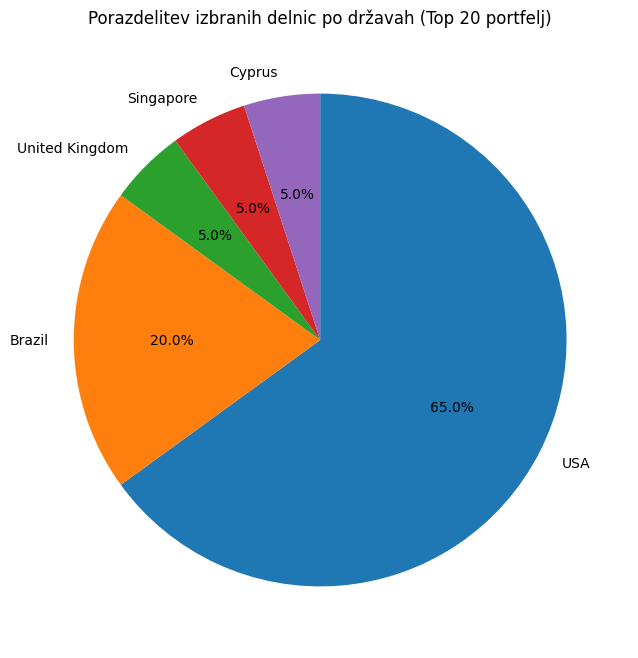

In [49]:
drzave = top20["Država"].value_counts()


plt.figure(figsize=(8,8))
plt.pie(
    drzave,
    labels=drzave.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)

plt.title("Porazdelitev izbranih delnic po državah (Top 20 portfelj)")
plt.show()

Na sliki vidimo porazdelitev izbranih delnic po državah v portfelju Top 20. Največji delež predstavljajo **ZDA (65 %)**, sledijo **Brazilija (20 %)** ter po **5 %** **Združeno kraljestvo**, **Singapur** in **Ciper**.Vidimo, da portfelj prevladujejo ameriške delnice, kar je pričakovano, vendar se med njimi najdejo tudi manjši deleži iz drugih držav.